# Numpy (numerical python)

Numpy is an incredibly powerful module that extends python data types to include arrays. The arrays can be of any number of dimensions and the mathematics available to arrays is very extensive. The most popular python modules for analytics (pandas, SciPy, & SciKit-Learn) are built off of numpy so the syntax is very similar.

To understand the need for numpy and arrays, consider something we learned when studying lists in the first tutorial.

In [1]:
my_list = [0, 1, 2, 3]
new_list = my_list * 5
print(new_list)

[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]


Lists are great for keeping a collection of items that can be different, but they do not offer the ability to apply mathematics to their functionality. Numpy solves this, and many other, problems.

## 1. Numpy import statement

##### Always use the import statement: import numpy as np

##### ALWAYS!

This is necessary for two reasons.
1. numpy contains several functions that have the same name as functions in base python. If you just import numpy (without the as np) then it will be confusing to know which functions you are callings (base python or numpy).  Whenever you want to call a function in numpy, you reference it by typing np.function_name.
2. Python code will be read 10X more than it will be written, so programming standards are extremely important (as are naming conventions.) If you see np.function then everyone knows you are referring to numpy's version of the function.

In [2]:
import numpy as np

## 2. Creating 1-dimensional arrays

Creating a numpy array is simple and looks a lot like a list

In [8]:
arr = np.array([0,1,2,3,4])
print(arr)
print('array type: ',type(arr))
print('array length: ',len(arr))

[0 1 2 3 4]
array type:  <class 'numpy.ndarray'>
array length:  5


##### NOTE: ndarray stands for n-dimensional array.

In our example, n = 1, so we have a one dimensional array. Numpy arrays can be any number of dimensions, although showing them visually, for example if n > 3,  is a challenge.

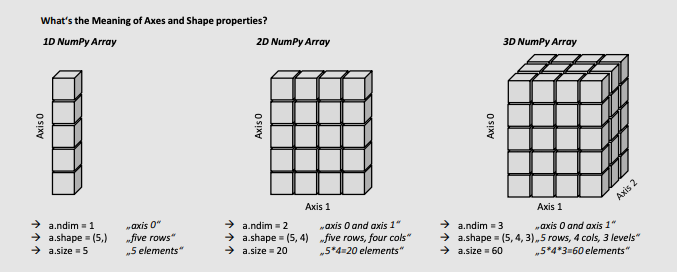


### 2. a. ndarray attributes
Attributes describe an object, just like methods are functions specific to an object.

For example, attributes of a car include: color, weight, horsepower, number of seats, etc.

To see the attributes and methods available of our ndarray, type the array name and . and then tab in a notebook and you will see a list of the attributes and methods you can use or return.

In [303]:
# Put your curser after the period below and hit tab to see attributes and methods
arr.

##### NOTE: Since attribures are NOT methods, you do not need to put ( ) after the attribute to see the value

In [14]:
# ndim returns the number of dimensions
arr.ndim

1

In [17]:
# shape returns the shape of the array (matrix) 
#(how many squares in each dimension does it occupy or how any bricks would you need to build it in a tower)
arr.shape

(5,)

##### NOTE: Shape lists this array as 5 long, but it does not specify the second dimension (which we would call 1). This is a part of numpy that is most confusing and unfortunately throws a lot of errors. We will show how to reshape these later

In [16]:
# Size returns the number of elements in the array
arr.size

5

### 2. b. Simple Math versus lists
###### Getting back to why we need ndarrays versus lists (math is easier)

In [38]:
print(arr)
new_arr = arr * 5
print(new_arr)

[0 1 2 3 4]
[ 0  5 10 15 20]


In [39]:
squared_arr = arr ** 2
squared_arr

array([ 0,  1,  4,  9, 16])

In [40]:
sq_root_arr1 = arr ** 0.5
sq_root_arr1

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ])

In [41]:
# now with the numpy function sqrt
sq_root_arr2 = np.sqrt(arr)
print(sq_root_arr2)

[0.         1.         1.41421356 1.73205081 2.        ]


So ndarrays make mathematical operations much easier.

## 3. Indexing, subsetting and slicing
Indexing, subsetting and slicing in numpy looks a lot like indexing in a list

In [42]:
print(arr)
this_numb = arr[0]
this_numb

[0 1 2 3 4]


0

In [43]:
first_two = arr[:2]
first_two

array([0, 1])

In [44]:
last_two = arr[-2:]
last_two

array([3, 4])

##### Other methods that are similar to what we have learned before

In [125]:
print('original array: ', arr)
# adding one element with append
arr2 = np.append(arr, 5)
print('appended array: ', arr2)

# adding multiple new elements with append
arr2 = np.append(arr, [6, 7, 8, 9])
print('further appended array: ', arr2)

original array:  [0 1 2 3 4]
appended array:  [0 1 2 3 4 5]
further appended array:  [0 1 2 3 4 6 7 8 9]


## 4.  Boolean Masks

Boolean masks are an extremely powerful! The syntax here will allow us to create a sub array based on specific conditions, which is helpful for splitting up data and calculating statistics on sub-samples of your data.

For example, consider the following array of 10 bond yields.

In [200]:
yields = np.array([1.75, 2.25, 1.55, 5.75, 6.12, 4.33, 3.56, 3.25, 2.89, 4.89])
yields

array([1.75, 2.25, 1.55, 5.75, 6.12, 4.33, 3.56, 3.25, 2.89, 4.89])

Suppose we want a list of the bonds that have higher than average yields. We can do this simply with np.arrays. There is a long way and a short way to do this.

Lets start by taking the average yield of the bonds

In [201]:
avg_yld = yields.mean()
avg_yld

3.6339999999999995

###### Long Way
Create a mask (index) to the yields that are larger than the average yield and then create a new array using that mask.

Note: The mask_high_yields looks just like an intermediate step to sumproduct or sumif in Excel. It is a vector of zeros and ones (which are true/false)

In [204]:
# just to see the yields in the output cell
print(yields)

# The line below is just testing if the statement is true for each element of the yields array
mask_high_yields = yields>avg_yld
print(mask_high_yields)

# The statement below is creating a seperate array (high_yields) where the mask we created is true
high_yields = yields[mask_high_yields]
print(high_yields)

[1.75 2.25 1.55 5.75 6.12 4.33 3.56 3.25 2.89 4.89]
[False False False  True  True  True False False False  True]
[5.75 6.12 4.33 4.89]


###### Quicker Way
Combine the two steps into one step.
Here we are saying give me the yields [where the yield is greater than the average yield] and assign that to high_yields.

In [203]:
high_yields = yields[yields>avg_yld]
high_yields

array([5.75, 6.12, 4.33, 4.89])

You can combine the boolean indexing with numpy methods, such as mean, sum, max, median, std (standard deviation) and corrcoef

In [128]:
low_yields_avg = yields[yields<avg_yld].mean()
low_yields_avg

2.5416666666666665

In [129]:
low_yields_std = yields[yields<avg_yld].std()
low_yields_std

0.7478060503157813

## 5. Creating special arrays

### 5. a. Random Arrays

Numpy is very powerful. You can create arrays of very many random variables easily with the np.random functions
 - np.random.rand() uniform random numbers between zero and one
 - np.random.randint() random integers between two integers
 - np.random.randn() random numbers from a standard normal distribution
 - np.random.normal() random numbers from a normal distribution with user supplied mean and standard deviation
 - np.random.choice()

In [133]:
# uniform distribution (between zero and 1)
uniform_dist = np.random.rand(100)
print(uniform_dist)

[0.28992938 0.85741771 0.04655304 0.67755831 0.02529187 0.1943833
 0.02672113 0.14856261 0.74146368 0.07148244 0.05334232 0.38495621
 0.48435574 0.75861259 0.45200072 0.0358817  0.79832092 0.29137011
 0.81896788 0.25245832 0.01263143 0.79876674 0.69392344 0.60676969
 0.82406941 0.21098549 0.42402067 0.93207882 0.27930298 0.17672548
 0.77945914 0.6048602  0.68406716 0.32466986 0.85580625 0.23261264
 0.57399554 0.17798352 0.88506832 0.1969495  0.2756602  0.53246269
 0.68842296 0.57656782 0.62086738 0.65595317 0.93736829 0.33513526
 0.03626746 0.80373507 0.19072024 0.30806053 0.52698001 0.18529668
 0.99884522 0.29104711 0.65158594 0.44309699 0.24279211 0.4883071
 0.85560053 0.11156688 0.66757334 0.21948299 0.42478534 0.62201613
 0.06919676 0.67455547 0.2726052  0.67631722 0.1872059  0.8393884
 0.69276558 0.91903745 0.37588285 0.15248454 0.66998999 0.82697376
 0.89723585 0.38014602 0.6604068  0.79268831 0.75258759 0.39497969
 0.50996458 0.30793862 0.99407774 0.96369572 0.38181515 0.3875187

In [136]:
# random integers between two limits
lower_bound = 0
upper_bound = 10 #This is exclusive! So it only goes to n-1
number_ints = 100
rand_ints = np.random.randint(lower_bound, upper_bound, number_ints)
rand_ints

array([5, 3, 9, 5, 9, 5, 4, 1, 8, 7, 3, 6, 7, 7, 4, 4, 0, 3, 9, 6, 2, 7,
       3, 0, 3, 7, 8, 4, 0, 0, 2, 2, 6, 6, 7, 2, 9, 2, 0, 6, 2, 3, 9, 8,
       7, 6, 2, 6, 1, 9, 6, 3, 1, 5, 2, 3, 4, 5, 3, 3, 9, 0, 6, 7, 8, 5,
       3, 4, 0, 5, 1, 2, 0, 1, 4, 0, 1, 2, 6, 1, 2, 7, 8, 8, 2, 4, 7, 8,
       1, 8, 1, 1, 2, 7, 7, 4, 4, 0, 8, 0])

In [207]:
# random numbers from a standard normal distribution (mean = 0, standard_deviation = 1)
std_norm = np.random.randn(100)
print(std_norm)

#check the number of observations outside of + / - 1 std deviation
count_outliers = len(std_norm[std_norm>1]) + len(std_norm[std_norm< -1])
print('Number or items outside of 1 std deviation from the mean: ',count_outliers)

# should be close to 32

[-1.16055505 -1.28042012 -0.7283211  -0.35854951 -2.19080916 -1.39224737
  0.17591277 -0.52254778  0.3244331  -0.19520506 -0.30604872  0.44912215
  0.19587811 -1.04378692  1.2634378  -1.55891717 -0.70905848 -0.85375427
 -0.1330613   1.19122379 -0.77600953  0.79612251 -0.82173401  0.70434433
  1.66959489  0.31704293 -1.94103782 -0.39876647  1.02418723 -1.03312584
  0.91734478  0.07949149 -0.52576447  0.99438553  1.29496341  0.37056645
  0.31744148 -0.58091294 -0.12632344 -0.47236097  1.40126152  0.72282999
  0.07428635 -1.46237842 -1.94172124 -1.53792215  1.17519676 -0.53882572
 -0.81281997 -3.00979452  0.15405827 -1.87883028 -1.50567768  0.37269637
  0.05322319 -2.03928149  0.65956649  0.77262228  0.99459276  1.28656536
 -0.36874566  0.4988713  -0.58595647  0.89344901  0.93838288  0.38478367
 -1.92301617 -0.54824012  0.25158087 -1.64108544 -0.53545467 -0.57454579
  0.1065396   2.52308813 -1.70751461  0.22394587  0.30926387  0.82938983
 -1.34393751  1.06304048 -0.78540499 -0.20714235 -0

In [208]:
# normal distribution from a user provided mean and standard deviation
this_mean = 10
this_std = 5
norm_dist=np.random.normal(this_mean, this_std, 100)
norm_dist

array([12.09428096,  0.32358978,  2.77301902, 10.50715816,  6.12955303,
        7.4811539 , 19.55435546, 19.37656438,  6.8156308 , 17.37090496,
        2.84282567, 22.75521815, 17.864185  , 12.49257112,  2.394301  ,
       -0.69117982, 10.72016026, 16.26458051, 11.19903825, 10.01695215,
       19.1623122 , 13.14308458, 13.56843218, 17.52042435,  5.25494147,
       22.59281328,  5.72535205, 15.49399587, 15.41268064,  2.27351393,
       18.3983945 ,  5.09947023,  5.6065137 , 20.24422824, -0.25982454,
       13.61018167,  6.61189658, 17.88728879,  8.3694507 , 12.33395818,
       14.20375321,  6.33510253,  9.80742044, 12.37549641,  7.19625454,
        8.42392871, 12.45334241, 15.34495464, 11.75806223, 12.94637141,
       11.46009112, 19.1099639 ,  8.62913232, 11.23454117,  9.7675066 ,
        3.96407708, 16.18636716, 10.33343179, 14.06343251, 11.36377902,
        9.80872631,  3.5121016 , 16.76169572,  4.318161  , 12.89754716,
        9.60616679,  8.0859146 , 11.29827579,  4.00252059,  7.05

In [209]:
# np.random.choice samples from a list or array to create a random choice
test_array = [1,2,3,4,5,6, 7, 8, 9, 10]
choice_array = np.random.choice(test_array, 100)
choice_array

array([ 6,  5, 10,  2,  4,  5,  8,  8,  3,  8,  5, 10,  7,  9,  6,  4,  5,
       10,  9,  2,  6,  9,  2,  3,  6,  5,  7,  3,  8,  5,  2,  8,  6,  8,
        7,  9,  7, 10, 10,  6,  3,  3, 10,  8,  8,  9,  9,  7,  3,  3,  1,
        4,  2,  1,  8, 10,  1,  2, 10,  5,  2,  3,  7,  5,  4, 10,  8,  9,
       10, 10,  6,  3,  6,  6,  8,  6,  1,  4, 10,  7,  7,  4,  5,  7,  9,
        1,  7,  5,  4,  3,  7,  9,  5,  7,  6, 10,  2,  9,  8,  4])

NOTE: The list does not need to be just numbers. We can do this from any list or array

In [211]:
new_choices = ['bird', 'monster', 'Dora the Explorer', 7]
choice_array = np.random.choice(new_choices, 10)
choice_array

array(['monster', 'monster', 'monster', 'Dora the Explorer', 'bird',
       'monster', 'bird', '7', 'Dora the Explorer', 'monster'],
      dtype='<U17')

### 5. b. Range or Linearly Spaced Arrays

Like range objects, which we covered in an earlier tutorial, numpy has range objects.
 - np.arange creates a range (this is very similar to python's range object)
 - np.linspace creates an evenly spaced range between two numbers

In [214]:
start_value = 100
stop_value = 430
step_size = 10
np_range = np.arange(start_value, stop_value, step_size)
np_range

array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
       360, 370, 380, 390, 400, 410, 420])

In [216]:
# the default values for start is 0, the default for step_size = 1
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Linspace has the following inputs with default values (there are more, but this is all we will use)
 - start (starting value of the sequence)
 - stop (end value of the sequence)
 - num = 50 (number of numbers to generate in the range)
 - endpoint=True (if True, the stop value is inclusive and is the last element of the range)
 

In [217]:
np_linspace = np.linspace(start_value, stop_value, num = 20, endpoint=True)
np_linspace

array([100.        , 117.36842105, 134.73684211, 152.10526316,
       169.47368421, 186.84210526, 204.21052632, 221.57894737,
       238.94736842, 256.31578947, 273.68421053, 291.05263158,
       308.42105263, 325.78947368, 343.15789474, 360.52631579,
       377.89473684, 395.26315789, 412.63157895, 430.        ])

##### Notice how although we provided integers as start_value, stop_value and num, the evenly spaced numbers in the array are not integers

### 5. C. Arrays of fixed values
Sometimes it is helpful to create (initialize) an array with some number and then fill it in later after the shape is set. For example, if you want to price a series of bonds and input those prices into an array, then setting up the array to be a list of zeros is more efficient than appending an array at every pricing step.

In [295]:
arr_zeros = np.zeros((10,10))
arr_zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [297]:
# usially very helpful if you are doing element-wise matrix multiplication
arr_ones= np.ones((5,5))
arr_ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

#### Even better are the *'_like' which creates a matrix of  with the same shape as another matrix!!!
 - zeros_like
 - ones_like
 - full_like

In [300]:
# here is our arr_ones matrix
print(arr_ones.shape)

# zeros_like for our arr_ones array
zeros_like = np.zeros_like(arr_ones)
print('new_shape', zeros_like.shape)
zeros_like


(5, 5)
new_shape (5, 5)


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [301]:
# full_like allows us to fill with a value
arr_full_like = np.full_like(arr_ones, 7)
arr_full_like

array([[7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.]])

## 6. 2-Dimensional Arrays

### 6. a. Creating 2-Dimensional Arrays
2-dimensional arrays are created by putting an extra set of square brackerts [ ] around the rows of the array
We will start with n= 2

In [152]:
array_2d = np.array([[0,1,2],
                     [3,4,5],
                     [6,7,8]])
array_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [162]:
array_2d_2 = np.array([[1,2,3,4,5,6], [7,8,9,10,11,12]])
array_2d_2

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

### 6. b. Indexing, subsetting and slicing 2D arrays


In [153]:
# : means taking all of the rows,
# 0 means taking the first column
first_column = array_2d[:,0]
first_column

array([0, 3, 6])

In [163]:
#Second row, every column
second_row = array_2d[1,:]
second_row

array([3, 4, 5])

In [155]:
# selecting one particular entry in the array
this_number = array_2d[1,2]
this_number

5

In [156]:
# selecting the first two rows
first_2_rows = array_2d[:2]
first_2_rows

array([[0, 1, 2],
       [3, 4, 5]])

In [164]:
# selecting the last two columns
last_2_cols = array_2d[:,-2:]
last_2_cols

array([[1, 2],
       [4, 5],
       [7, 8]])

In [158]:
# selecting the first 2 x 2 subset of the array
subset = array_2d[:2,:2]
subset

array([[0, 1],
       [3, 4]])

### 6. c.  Axis selcetion
For 2 dimensional arrays, we need to specify the axis we want the calculations performed on.
columns = 0
rows = 1

In [165]:
print(array_2d)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [166]:
print(array_2d.sum(axis=0))

[ 9 12 15]


In [167]:
print(array_2d.sum(axis=1))

[ 3 12 21]


In [168]:
# if we leave off the axis, it sums the entire array
print(array_2d.sum())

36


### 6. d. Sorting 2-dimensional arrays
np.sort() sorts an array. For a 1-dimensional array, this is easy. Note: this is not a method, but a function, so we need to have np.sort(array_you_are_sorting)

In [175]:
print(yields)
sorted_yields = np.sort(yields)
print(sorted_yields)

[1.75 2.25 1.55 5.75 6.12 4.33 3.56 3.25 2.89 4.89]
[1.55 1.75 2.25 2.89 3.25 3.56 4.33 4.89 5.75 6.12]


For 2 dimensional arrays, we need to specify the axis that we are sorting.
rows = 0
columns = 1

In [180]:
lower_bound = 0
upper_bound = 10 
# note for the size, we are entering a 2-dimensions in square brackers [ numb_rows, numb_cols]
rand_ints = np.random.randint(lower_bound, upper_bound, [5, 4])
print(rand_ints)

[[9 2 3 7]
 [2 3 6 7]
 [6 8 6 1]
 [8 0 2 1]
 [8 6 0 8]]


In [181]:
# sorting the columns
print(np.sort(rand_ints, axis=0))

[[2 0 0 1]
 [6 2 2 1]
 [8 3 3 7]
 [8 6 6 7]
 [9 8 6 8]]


In [182]:
# sorting the rows
print(np.sort(rand_ints, axis=1))

[[2 3 7 9]
 [2 3 6 7]
 [1 6 6 8]
 [0 1 2 8]
 [0 6 8 8]]


## 7. Combining  and splitting arrays

### 7. a. Combining Arrays

#### 7. a. i. Combining One Dimensional Arrays

There are multiple ways to combine two one-dimensional arrays. For example, suppose we have two arrays that have a length of 5 and a dimension of 1. We could combine to be any of the following:

 - an array with shape = 1, 10
 - an array with shape = 2, 5
 - an array with shape = 5, 2
 
We will cover the ways to create each of these below.



##### Matrix that is 1 x 10
Note: We saw this earlier with append

In [220]:
arr_1 = np.array([1,2,3,4,5])
arr_2 = np.array([6,7,8,9,10])
print(arr_1)
print(arr_2)
arr_3 = np.append(arr_1, arr_2)
print(arr_3)

[1 2 3 4 5]
[ 6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


In [235]:
# Another way to do this with concatenate
# note that stack an odd syntax for the arrays. The arrays to be stacked are in parenthesis separated by a comma.
# This is called a tuple.
arr3 = np.concatenate((arr_1, arr_2), axis=0)
arr3


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

##### Matrix that is 2 x 5 (2 rows by 5 columns)

In [233]:
# note that stack an odd syntax for the arrays. The arrays to be stacked are in parenthesis separated by a comma.
# This is called a tuple.
arr_3 = np.stack((arr_1, arr_2), axis = 0)
arr_3

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

##### Matrix that is 5 x 2 (5 rows by 2 columns)

In [241]:
# note that stack an odd syntax for the arrays. The arrays to be stacked are in parenthesis separated by a comma.
# This is called a tuple.
arr_3 = np.stack((arr_1, arr_2), axis = 1)
arr_3

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [245]:
# another way to do this would be to use column_stack
arr_3 = np.column_stack((arr_1, arr_2))
arr_3

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

#### 7. a. ii. Combining Multidimensional Arrays
There are multiple ways to combine arrays in numpy, but first you need to know what you want the final shape of the combined array to be.

For example, if we have a 2x2 matrix (matrix_A) and a 2x2 matrix (matrix_B) we need to know what we want the final matrix to look like after combining them

2 x 4 - then we will be using hstack (horizontal stacking)

4 x 2 - then we will be using vstack (vertical stacking)

We can also use np.concatenate and specify the axis

In [246]:
matrix_A = np.array([[1,2], [3,4]])
matrix_B = np.array([[5,6], [7,8]])
print('Matrix A: ')
print(matrix_A)
print('Matrix B: ')
print(matrix_B)

Matrix A: 
[[1 2]
 [3 4]]
Matrix B: 
[[5 6]
 [7 8]]


#### Ways to create a 2 x 4 matrix (horizontal stacking)

In [247]:
# note the odd syntax below. The two matricies are sent to the function as a tuple (matrix_A, matrix_B)
# this just means they are sent into the function in parenthesis separated by a comma
matrix_C = np.concatenate((matrix_A, matrix_B), axis=1)
matrix_C

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [248]:
matrix_C = np.hstack((matrix_A, matrix_B))
matrix_C

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

#### Ways to create a 4 x 2 matrix (horizontal stacking)

In [249]:
# note the odd syntax below. The two matricies are sent to the function as a tuple (matrix_A, matrix_B)
# this just means they are sent into the function in parenthesis separated by a comma
matrix_C = np.concatenate((matrix_A, matrix_B), axis=0)
matrix_C

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [250]:
matrix_C = np.vstack((matrix_A, matrix_B))
matrix_C

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

### 7. b. Splitting Arrays

There are several ways to split an array. We will coer the following

- array_split (splits 1-dimensional array into multiple sub arrays of near or equal size)
- vsplit (splits row-wise or vertically)
- hsplit (splits column-wise or horizontally)

In [256]:
arr_to_split = np.random.randint(0, 10, 100)
arr_to_split

array([9, 5, 1, 9, 1, 7, 9, 8, 7, 1, 2, 8, 3, 9, 4, 0, 7, 6, 8, 4, 9, 9,
       7, 4, 1, 4, 7, 2, 9, 1, 5, 1, 4, 7, 6, 4, 9, 0, 2, 3, 3, 8, 7, 1,
       8, 6, 5, 1, 6, 9, 8, 6, 5, 9, 0, 7, 0, 0, 1, 9, 8, 4, 5, 4, 8, 4,
       3, 8, 5, 1, 5, 7, 0, 6, 3, 8, 2, 5, 1, 8, 2, 3, 9, 8, 5, 9, 1, 0,
       1, 7, 5, 2, 0, 5, 4, 6, 7, 2, 5, 4])

In [260]:
# np.split separates the matrix into 10 equal components (works for 1D arrays)
arr_split = np.split(arr_to_split, 10)
arr_split

[array([9, 5, 1, 9, 1, 7, 9, 8, 7, 1]),
 array([2, 8, 3, 9, 4, 0, 7, 6, 8, 4]),
 array([9, 9, 7, 4, 1, 4, 7, 2, 9, 1]),
 array([5, 1, 4, 7, 6, 4, 9, 0, 2, 3]),
 array([3, 8, 7, 1, 8, 6, 5, 1, 6, 9]),
 array([8, 6, 5, 9, 0, 7, 0, 0, 1, 9]),
 array([8, 4, 5, 4, 8, 4, 3, 8, 5, 1]),
 array([5, 7, 0, 6, 3, 8, 2, 5, 1, 8]),
 array([2, 3, 9, 8, 5, 9, 1, 0, 1, 7]),
 array([5, 2, 0, 5, 4, 6, 7, 2, 5, 4])]

Now working in two dimensions with hsplit and vsplit

##### hsplit

In [268]:
arr_to_split_2D = np.random.randint(0, 10, (2,30))
print(arr_to_split_2D)

[[8 2 6 0 3 9 1 8 8 4 7 7 8 6 3 5 1 2 7 9 8 7 9 9 3 5 3 6 2 5]
 [6 4 0 0 6 8 9 2 6 0 5 0 2 6 7 9 6 2 8 8 0 3 7 7 5 1 4 2 2 4]]


In [269]:
arr_h_split = np.hsplit(arr_to_split_2D, 3)
arr_h_split

[array([[8, 2, 6, 0, 3, 9, 1, 8, 8, 4],
        [6, 4, 0, 0, 6, 8, 9, 2, 6, 0]]),
 array([[7, 7, 8, 6, 3, 5, 1, 2, 7, 9],
        [5, 0, 2, 6, 7, 9, 6, 2, 8, 8]]),
 array([[8, 7, 9, 9, 3, 5, 3, 6, 2, 5],
        [0, 3, 7, 7, 5, 1, 4, 2, 2, 4]])]

##### vsplit

In [270]:
arr_to_split_2D = np.random.randint(0, 10, (30,2))
print(arr_to_split_2D)

[[2 1]
 [6 9]
 [7 9]
 [4 4]
 [5 0]
 [1 4]
 [3 5]
 [4 8]
 [0 8]
 [3 1]
 [9 0]
 [6 9]
 [9 3]
 [2 7]
 [9 3]
 [8 7]
 [5 0]
 [8 8]
 [1 2]
 [3 4]
 [5 8]
 [2 2]
 [9 3]
 [4 1]
 [3 5]
 [3 2]
 [3 9]
 [9 3]
 [6 9]
 [1 1]]


In [271]:
arr_v_split = np.vsplit(arr_to_split_2D, 3)
arr_v_split

[array([[2, 1],
        [6, 9],
        [7, 9],
        [4, 4],
        [5, 0],
        [1, 4],
        [3, 5],
        [4, 8],
        [0, 8],
        [3, 1]]), array([[9, 0],
        [6, 9],
        [9, 3],
        [2, 7],
        [9, 3],
        [8, 7],
        [5, 0],
        [8, 8],
        [1, 2],
        [3, 4]]), array([[5, 8],
        [2, 2],
        [9, 3],
        [4, 1],
        [3, 5],
        [3, 2],
        [3, 9],
        [9, 3],
        [6, 9],
        [1, 1]])]

##### NOTE: The vsplit and hsplit functions return lists! These lists contain the split arrays.


### 7. c. Reshaping arrays
Sometimes a better alternative to splitting an array is the use numpys reshape function.

In [277]:
yields

array([1.75, 2.25, 1.55, 5.75, 6.12, 4.33, 3.56, 3.25, 2.89, 4.89])

In [279]:
yeilds_reshaped = np.reshape(yields,(5,2))
yeilds_reshaped

array([[1.75, 2.25],
       [1.55, 5.75],
       [6.12, 4.33],
       [3.56, 3.25],
       [2.89, 4.89]])

In [280]:
yeilds_reshaped = np.reshape(yields,(2,5))
yeilds_reshaped

array([[1.75, 2.25, 1.55, 5.75, 6.12],
       [4.33, 3.56, 3.25, 2.89, 4.89]])

Now for two dimensional reshaping, this is

In [281]:
arr_1D = np.arange(0,100,1)
arr_1D

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [284]:
arr_2D = np.reshape(arr_1D, (10,10))
arr_2D

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [285]:
arr_2D_again = np.reshape(arr_2D, (5, 20))
arr_2D_again

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

###### Suppose we want an array, but we do not know what the shape of the ultimate final array will be. We can still use reshape, but with the dimension we do not know input as '-1'. 
The -1 means 'whatever the hell you need to make the other dimension work!'

In [292]:
# reshaping the array to have one row and how ever many columns we need
arr_1D_again = np.reshape(arr_2D_again, (1,-1))
arr_1D_again

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [293]:
# now trying this as one column array
arr_1D_again = np.reshape(arr_2D_again, (-1,1))
arr_1D_again

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

### <font color=red> This may be the most confusing thing about numpy!</font>

### One dimensional arrays in numpy often have to be reshaped. This is because the shape attribute is suppresses the second dimension if it is 1 dimensional. 
See the arr_1D shape below.There is nothing in the second dimension.

In [286]:
arr_1D.shape

(100,)

To fix this, we need to reshape the array using -1 as the second input

In [291]:
arr_1D = np.reshape(arr_1D, (-1,1))
arr_1D.shape

(100, 1)

When sending arrays to other modules (sklearn, scipy, matplotlib) we may need to reshape the 1D arrays before any functions work

## 8. More Advanced Comparisons

- argmax -returns the indicies of the maximum values along an axis
- argmin -returns the indicies of the maximum values along an axis

In [316]:
norm_dist = np.random.normal(10,3, 50)
norm_dist

array([12.42851431, 12.434694  ,  5.29988773,  6.07457828,  7.90317574,
        1.76459757, 16.11600777,  9.153354  ,  7.06822912,  8.2161308 ,
        6.97264511,  6.02396226,  4.96767022,  9.7825093 , 12.03645301,
        9.60751288,  8.45336467, 11.22711576,  6.35309531,  6.96397764,
        6.9789523 ,  4.55214425, 10.04031341,  9.50172783,  6.74508494,
        2.44922956, 13.7954111 ,  9.96123561, 13.61630758, 10.52523579,
       10.25161947,  7.82161098, 10.90260319,  7.81277126,  9.03751256,
       17.06470479,  8.62491578,  9.89213774, 16.5828583 , 13.27353701,
       10.48717256, 13.84377548,  5.71317827, 10.35430708,  8.5196353 ,
        9.50723791, 11.0034588 ,  8.72060339,  9.78267703, 12.58256784])

In [317]:
matrix_max = np.argmax(norm_dist)
print(matrix_max)
print(norm_dist[matrix_max])

35
17.064704791714696


In [320]:
# To look at different maximums for a column or row, first we need to reshape the matrix
norm_dist = norm_dist.reshape((10,5))
norm_dist

array([[12.42851431, 12.434694  ,  5.29988773,  6.07457828,  7.90317574],
       [ 1.76459757, 16.11600777,  9.153354  ,  7.06822912,  8.2161308 ],
       [ 6.97264511,  6.02396226,  4.96767022,  9.7825093 , 12.03645301],
       [ 9.60751288,  8.45336467, 11.22711576,  6.35309531,  6.96397764],
       [ 6.9789523 ,  4.55214425, 10.04031341,  9.50172783,  6.74508494],
       [ 2.44922956, 13.7954111 ,  9.96123561, 13.61630758, 10.52523579],
       [10.25161947,  7.82161098, 10.90260319,  7.81277126,  9.03751256],
       [17.06470479,  8.62491578,  9.89213774, 16.5828583 , 13.27353701],
       [10.48717256, 13.84377548,  5.71317827, 10.35430708,  8.5196353 ],
       [ 9.50723791, 11.0034588 ,  8.72060339,  9.78267703, 12.58256784]])

In [323]:
max_columns = np.argmax(norm_dist, axis=1)
print(max_columns)

[1 1 4 2 2 1 2 0 1 4]


In [324]:
max_rows = np.argmax(norm_dist, axis=0)
print(max_rows)

[7 1 3 7 7]


In [325]:
min_rows = np.argmin(norm_dist, axis=0)
print(min_rows)

[1 4 2 0 4]
